# Uso del suelo en Alicante

In [12]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

shp_file = "../../datasets/callejero/manzanas.shp"
gdf = gpd.read_file(shp_file).drop(columns = ["ALTA_DB"])


In [13]:
print(gdf.shape)
gdf.head()

(49051, 3)


,ID_MANZ,INE_MUN,geometry
0,30010000001,3001,"POLYGON ((-0.15208 38.84878, -0.15199 38.84877..."
1,30010000002,3001,"POLYGON ((-0.15244 38.84881, -0.15243 38.84887..."
2,30010000003,3001,"POLYGON ((-0.17089 38.87526, -0.17089 38.87525..."
3,30010000004,3001,"POLYGON ((-0.17146 38.87455, -0.17149 38.87448..."
4,30010000005,3001,"POLYGON ((-0.15764 38.85195, -0.15764 38.85198..."


La primera columna no es más que un ID que distingue cada una de las 49051 manzanas en Alicante:

In [43]:
len(gdf), gdf.ID_MANZ.nunique()

(49051, 49051)

En cuanto a la columna INE_NUM, es un identificador de los municipios donde se encuentran las regiones de suelo:

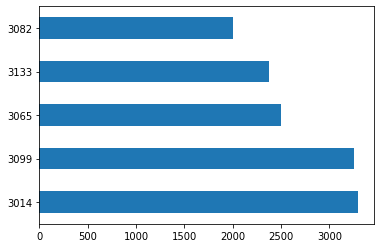

In [45]:
gdf.INE_MUN.value_counts().head().plot.barh()
plt.show()

El municipio con mayor número de manzanas registradas es Alicante (ID: 3014), seguido de cerca por Elche (ID: 3099).

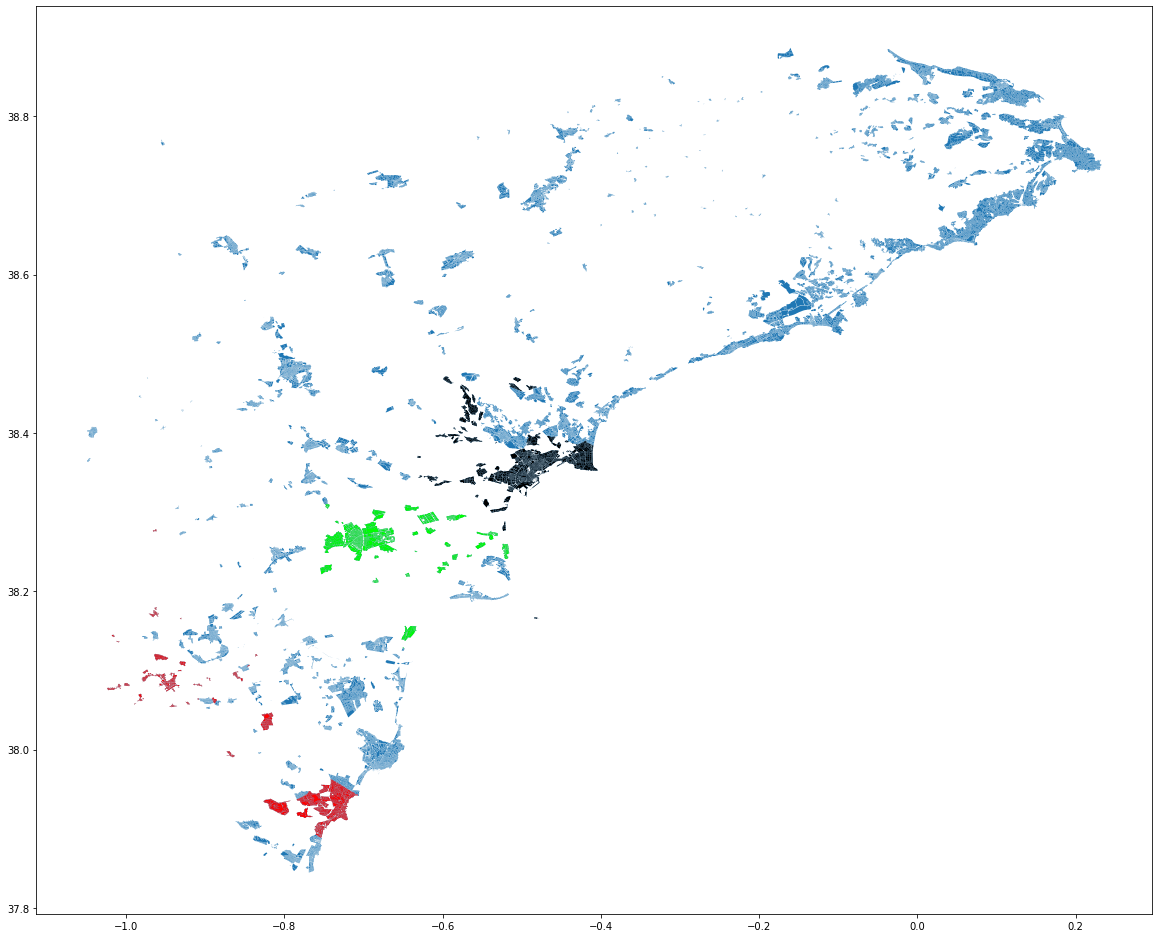

In [50]:
ax = gdf.plot(figsize = (20,20))
cities = {3014: "#000", 3099: "#f00", 3065: "#0f0"}

for id_ in cities:
    gdf[gdf.INE_MUN == id_].plot(ax = ax, color = cities[id_])

plt.show()

Colores:

- En azul, manzanas en la provincia de Alicante.
- En negro, ciudad de Alicante.
- En verde, Elche.
- En rojo, Orihuela.

Cada manzana viene representada por un polígono en 2D delimitado por sus coordenadas:

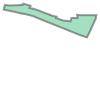

In [22]:
gdf.geometry[0]

In [29]:
np.array(gdf.geometry[0].exterior.xy).shape

(2, 125)

Como ejemplo, hacemos zoom en Alicante:

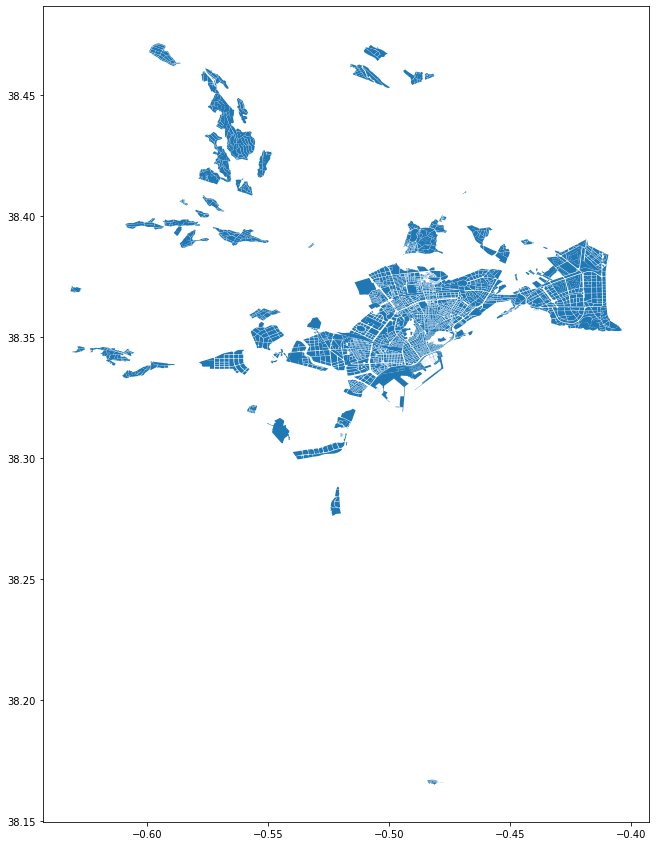

In [51]:
ID_CITY = {
    3050: "El Campello",
    3014: "Alicante"
}
id_ = 3014
gdf_with_id = gdf[gdf.INE_MUN == id_]
ax = gdf_with_id.plot(figsize = (15,15))

Como curiosidad, hay una pequeña nube de manzanas al sur. Esto es la isla de Tabarca:

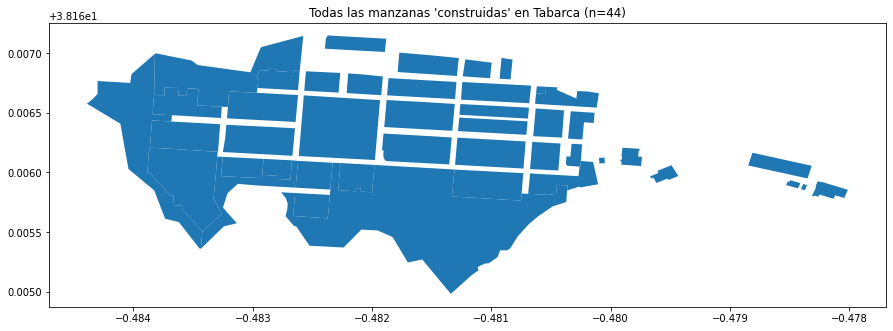

In [52]:
import matplotlib.pyplot as plt

tabarca = gdf[(gdf.INE_MUN == id_) & (gdf.geometry.centroid.y < 38.2)]
gdf["area"] = gdf.geometry.apply(lambda polygon: polygon.area)

ax = tabarca.plot(figsize = (15,15))


# df[df.POBLACION == "Alicante/Alacant"].plot.scatter("lat", "lon", figsize = (15,15), alpha = 0.5, c = "#bb0", ax = ax_)

ax.set_title(f"Todas las manzanas 'construidas' en Tabarca (n={len(tabarca)})")

plt.show()

Si hacemos zoom en la ciudad de Alicante:

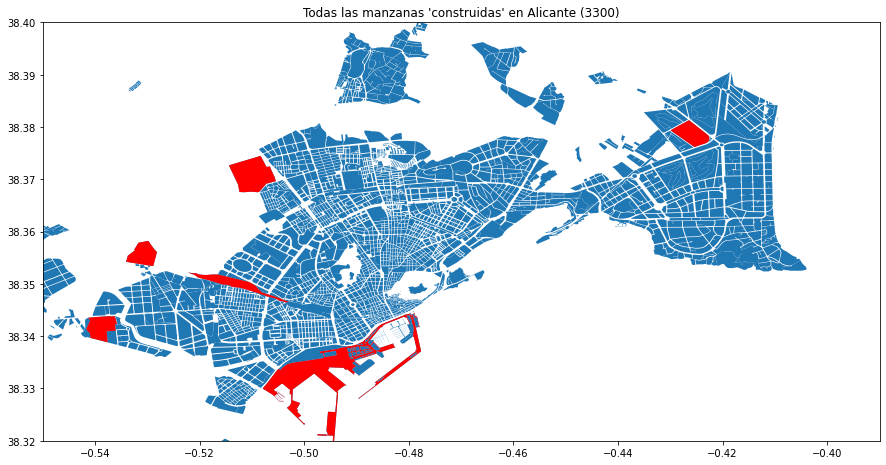

In [36]:
import matplotlib.pyplot as plt

gdf["area"] = gdf.geometry.apply(lambda polygon: polygon.area)

ax = gdf_with_id.plot(figsize = (15,15))
gdf[gdf.INE_MUN == id_].sort_values("area").tail(10).plot(figsize = (20,20), color = "#f00", ax = ax)

# df[df.POBLACION == "Alicante/Alacant"].plot.scatter("lat", "lon", figsize = (15,15), alpha = 0.5, c = "#bb0", ax = ax_)

ax.set_title(f"Todas las manzanas 'construidas' en {ID_CITY[id_]} ({gdf_with_id.shape[0]})")
ax.set_ylim(38.32, 38.40)

ax.set_xlim(-0.55, -0.39)

plt.show()

En rojo aparecen las manzanas más grandes en la ciudad de Alicante. Algunas de ellas son:

- Al sur distinguimos el puerto.
- Al norte está la base militar de Rabasa (Acuartelamiento Alferez Rojas Navarrete).
- Al noroeste está el cementerio.

## Portales

In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_parquet("../../datasets/callejero/calles.parquet")

print(df.shape)
df.head()

(430833, 21)


,ID_PORPK,ID_TRAMO,ID_VIAL,TIPO_VIAL,NOMBRE_VIA,NUMERO,EXTENSION,DGC_VIA,CODIGO,ID_POB,POBLACION,COD_POSTAL,TIPO_PORPK,TIPOPORPKD,SENTIDOPK,SENTIDOPKD,FUENTE,FUENTED,FECHA_ALTA,lat,lon
0,30140019059,30140001871,30140000141,None,CASTAÑOS,29,None,141,301401835,1000000520,Alicante/Alacant,03001,1,Portal,-998,None,2,Dirección General del Catastro,2020-05-29,-0.485832,38.346166
1,30140019124,30140001099,30140000559,None,SAN FERNANDO,48,None,559,301405245,1000000520,Alicante/Alacant,03001,1,Portal,-998,None,2,Dirección General del Catastro,2020-05-29,-0.486480,38.342533
2,30140019836,30140001670,30140000141,None,CASTAÑOS,19,None,141,301401835,1000000520,Alicante/Alacant,03001,1,Portal,-998,None,2,Dirección General del Catastro,2020-05-29,-0.485500,38.345432
3,30140019919,30140001702,30140000416,None,MEDICO PASCUAL PEREZ,33,None,416,301403995,1000000520,Alicante/Alacant,03001,1,Portal,-998,None,2,Dirección General del Catastro,2020-05-29,-0.488875,38.345622
4,30140019942,30140001760,30140000436,None,"NAVAS, LAS",37,None,331,301404200,1000000520,Alicante/Alacant,03001,1,Portal,-998,None,2,Dirección General del Catastro,2020-05-29,-0.487333,38.345935


<Axes: xlabel='lat', ylabel='lon'>

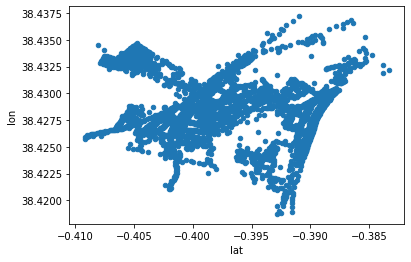

In [68]:
df[df.POBLACION == "el Campello"].plot.scatter("lat", "lon")

Esta nube de puntos cobra más sentido cuando la combinamos con los datos presentados en la anterior sección:

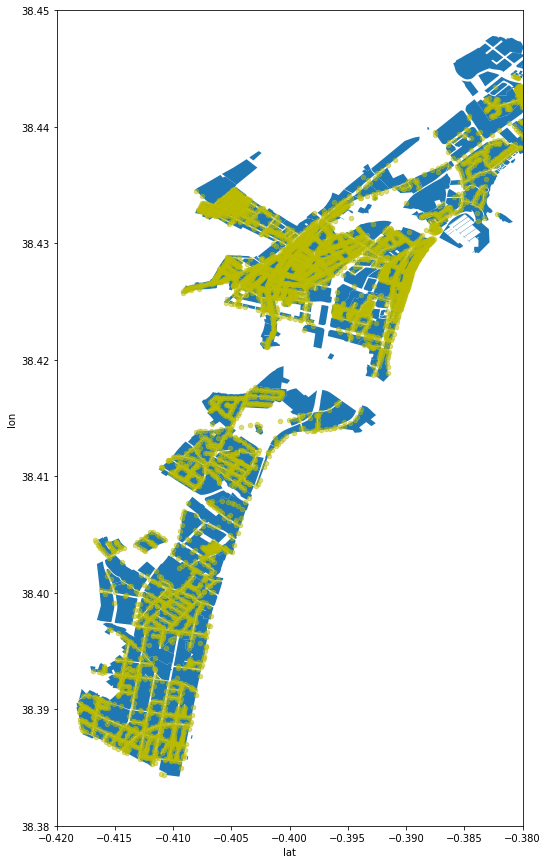

In [81]:
ID_CITY = {
    3050: "El Campello",
    3014: "Alicante"
}

id = 3050

el_campello_zonas = ['Urbanització Mutxavista', 'el Campello', "L'Almadrava", "Els Banyets"]

gdf_with_id = gdf[gdf.INE_MUN == id]

fig, ax_ = plt.subplots(1,1, figsize = (15,15))
gdf_with_id.plot(figsize = (15,15), ax = ax_)
df[(df.POBLACION.apply(lambda x: x in el_campello_zonas))].plot.scatter("lat", "lon", figsize = (15,15), alpha = 0.5, c = "#bb0", ax = ax_)

ax_.set_xlim(-0.42, -0.38)
ax_.set_ylim(38.38, 38.45)

plt.show()

En cuanto a la ciudad de Alicante:

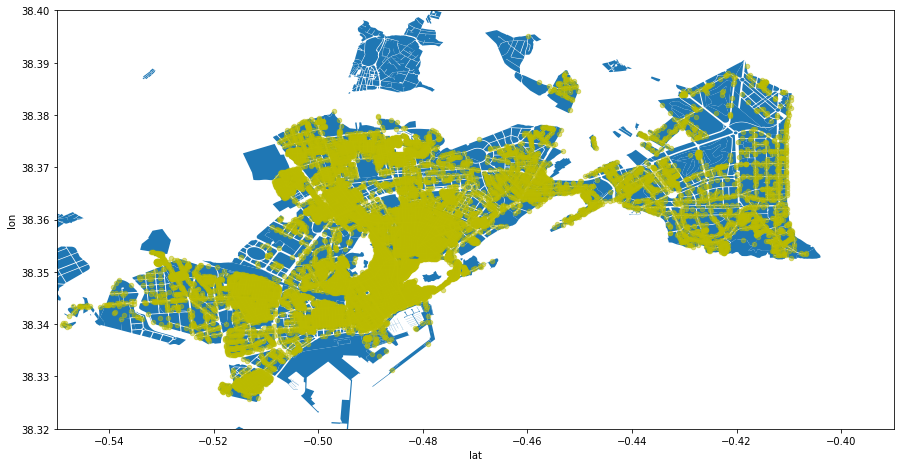

In [85]:
ID_CITY = {
    3050: "El Campello",
    3014: "Alicante"
}

id = 3014

gdf_with_id = gdf[gdf.INE_MUN == id]

fig, ax_ = plt.subplots(1,1, figsize = (15,15))
gdf_with_id.plot(figsize = (15,15), ax = ax_)
df[df.POBLACION == "Alicante/Alacant"].plot.scatter("lat", "lon", figsize = (15,15), alpha = 0.5, c = "#bb0", ax = ax_)

ax_.set_ylim(38.32, 38.40)
ax_.set_xlim(-0.55, -0.39)

plt.show()